In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
metadata=pd.read_csv('data/movies_data.csv')

# 数据预览

In [3]:
metadata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [4]:
metadata.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [5]:
metadata = metadata.reset_index() # 设置每部电影的编号

# 数据分析

### 数据相关性

<AxesSubplot:>

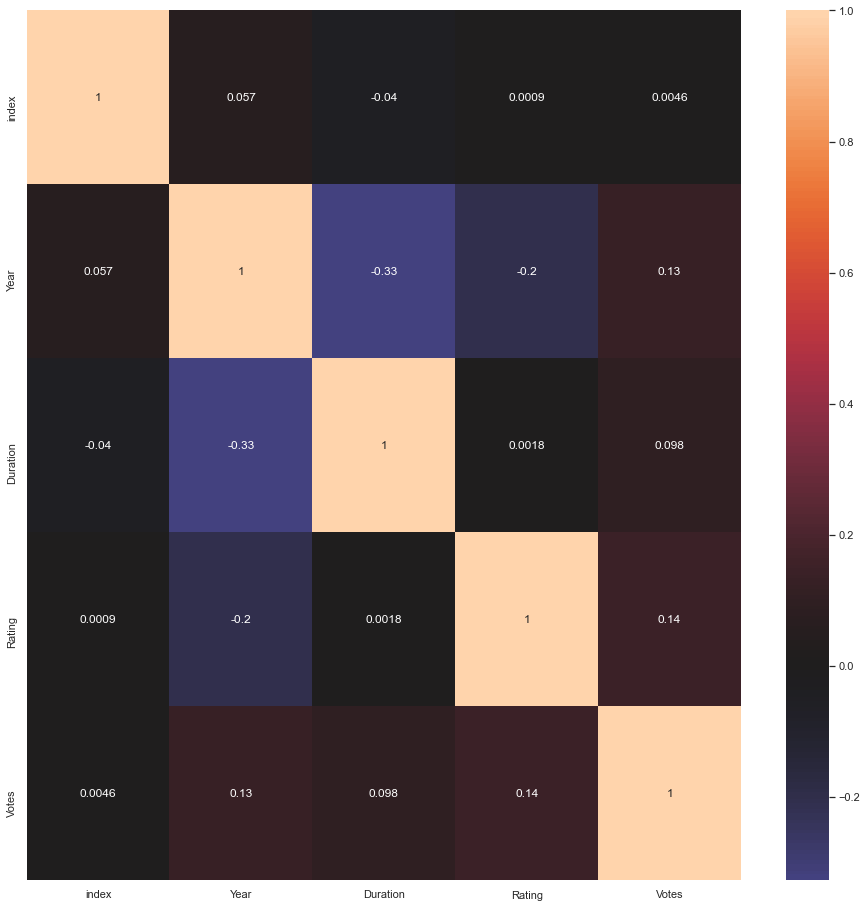

In [6]:
corrs = metadata.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,
             annot=True, # 注入数据
            center = 0)  # 绘制有色数据时将色彩映射居中的值)

### 不同年份电影的数量 

#### 获得相关数据

In [7]:
year_data=metadata.groupby(by='Year')

In [8]:
cnt=0    # 计数
dict1={} # 保存年份
dict2={} # 保存数量
dict3={} # 保存评分的平均分
dict4={} # 保存评分的最大值
dict5={} # 保存评分最大的电影的编号
for gp, data in year_data:
    cnt+=1
    dict1[cnt]=gp
    dict2[cnt]=data.shape[0]
    dict3[cnt]=np.mean(data['Rating'])
    dict4[cnt]=np.max(data['Rating'])
dict_={'year':dict1,'cnt':dict2,'means':dict3,'max':dict4}
movie_num_every_year=pd.DataFrame(dict_)

In [9]:
movie_num_every_year

,year,cnt,means,max
1,1931,2,5.750000,6.2
2,1932,1,6.000000,6.0
3,1933,1,6.200000,6.2
4,1934,2,5.600000,8.5
5,1935,5,5.700000,7.4
...,...,...,...,...
87,2017,211,6.012796,9.0
88,2018,202,6.150495,9.3
89,2019,227,6.265198,9.4
90,2020,140,6.123571,10.0


#### 每年电影的数量

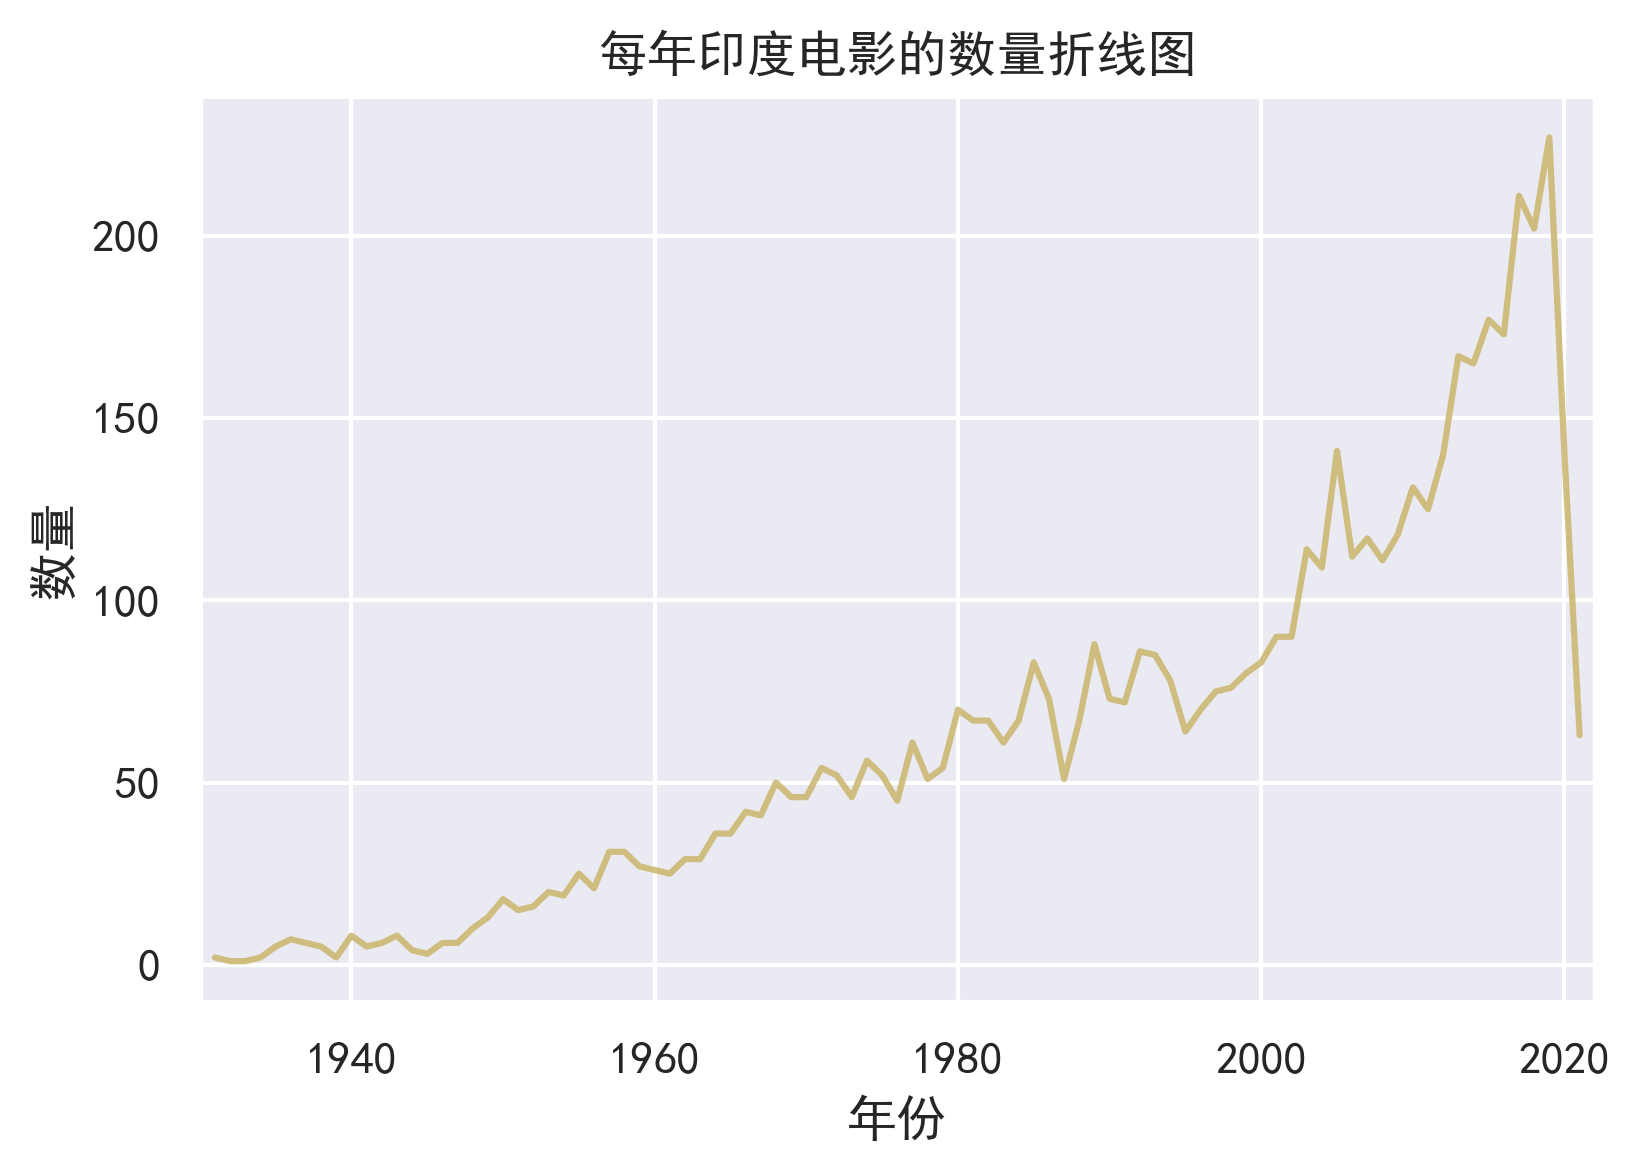

In [10]:
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

fig= plt.figure(dpi=300)
plt.rcParams['savefig.dpi'] = 300 #图片像素
x=movie_num_every_year['year'].values
y1=movie_num_every_year['cnt'].values
plt.plot(x,y1,c='y',marker='',alpha=0.9)
plt.xlim(1930,2022)
plt.title("每年印度电影的数量折线图")
plt.xlabel("年份")
plt.ylabel("数量")
plt.savefig("每年电影数量.jpg")

#### 不同年份电影平均评分和最高评分

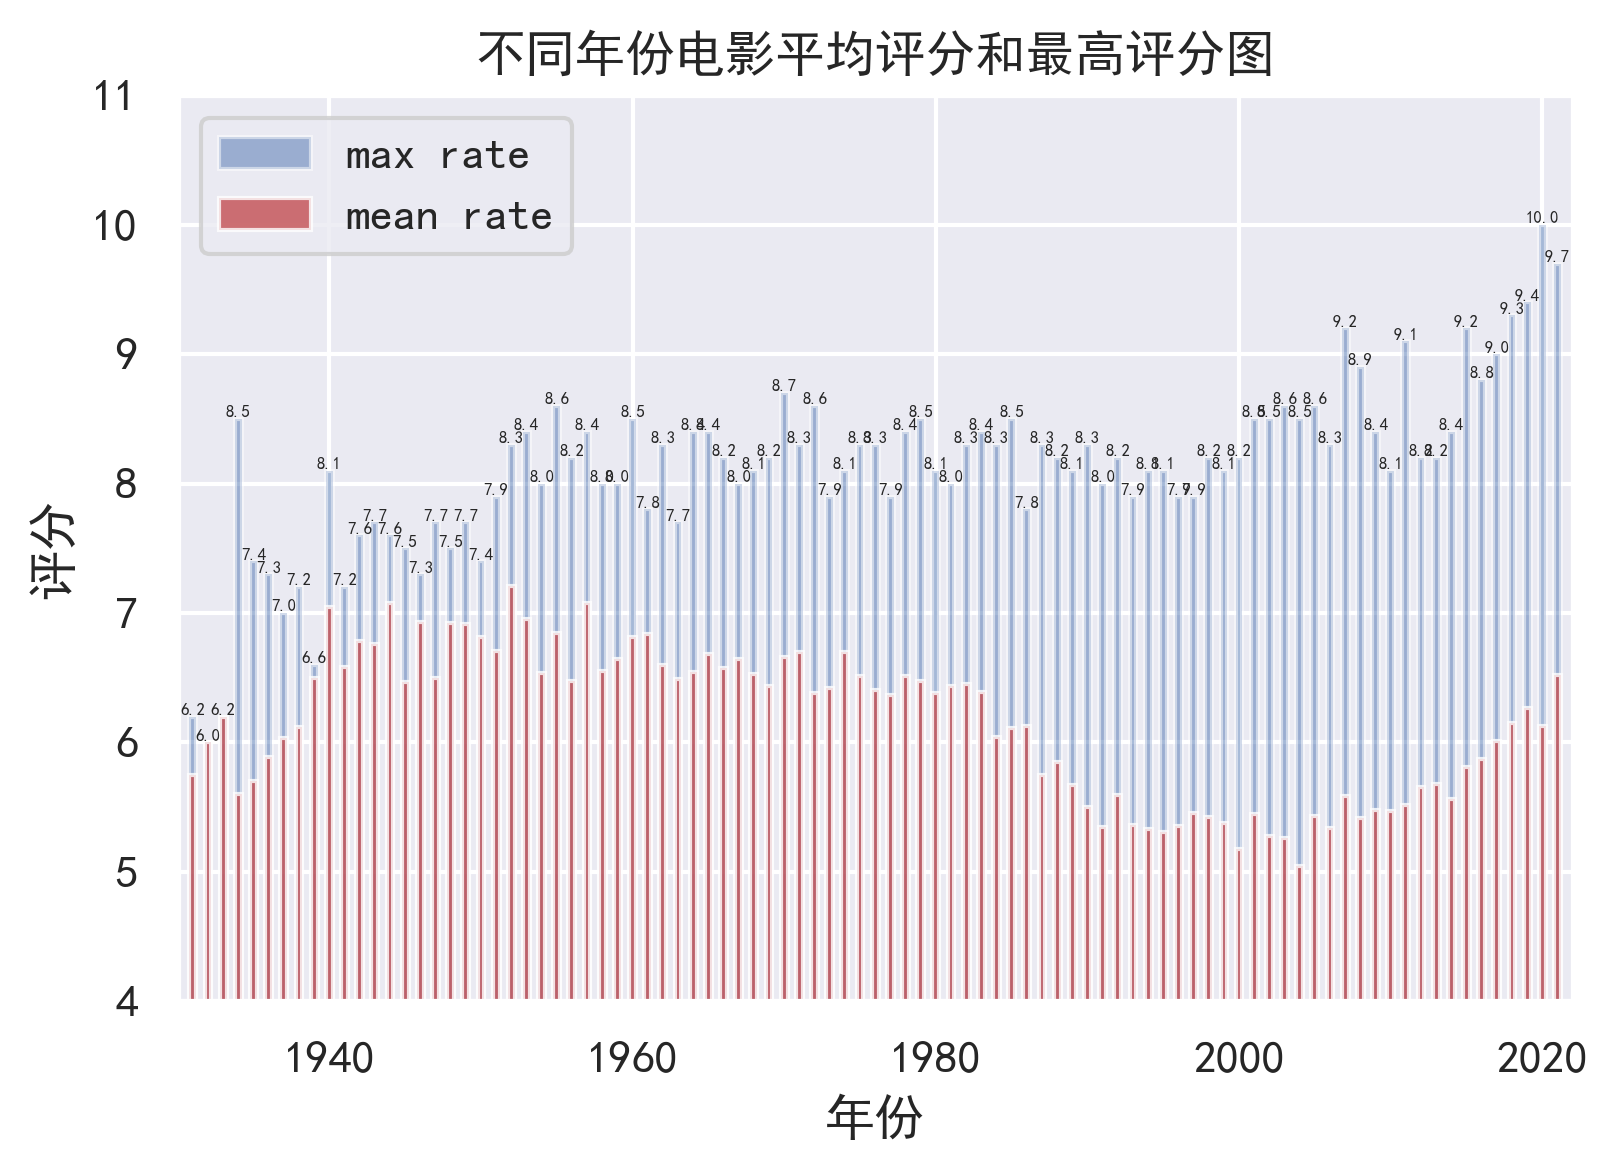

In [11]:
fig=plt.figure(dpi=300)
y2=movie_num_every_year['means'].values
y3=movie_num_every_year['max'].values
#条形图
plt.bar(x,y3,width = 0.45,align='center',color = 'b',alpha=0.5,label='max rate')
plt.bar(x,y2,width = 0.45,align='center',color = 'r',alpha=0.8,label='mean rate')
plt.ylim(4,11)
plt.xlim(1930,2022)
plt.xlabel('年份')
plt.ylabel('评分')
plt.title('不同年份电影平均评分和最高评分图')
plt.legend()
# 打印下方条形图的数据
for a,b in zip(x,y3):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=4)
#保存成图片
plt.savefig("不同年份电影平均评分和最高评分.jpg")


### top movies

In [12]:
dict_={}
for gp,data in year_data: # 获得数据
    data.sort_values(by=['Rating','Votes'],ascending=[False,False],inplace=True) # 排序：先以评分，再是投票
    dict_[gp]=data.iloc[0,:]
top_movies=pd.DataFrame(dict_)
top_movies = top_movies.T
top_movies.columns=metadata.columns

In [13]:
top_movies

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1931,5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1932,2293,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,1736,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
1934,3366,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
1935,2299,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
2017,4319,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,536,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,1897,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
2020,3146,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [14]:
type_of_top_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in top_movies['Genre'].values:
    ls=ty.split(', ') # 拆分字符串，获得电影类型
    for i in ls: # 记录
        if i in type_of_top_movies.keys():
            type_of_top_movies[i]+=1
        else:
            type_of_top_movies[i]=1
type_of_top_movies=pd.Series(type_of_top_movies) # 转化为Serise格式

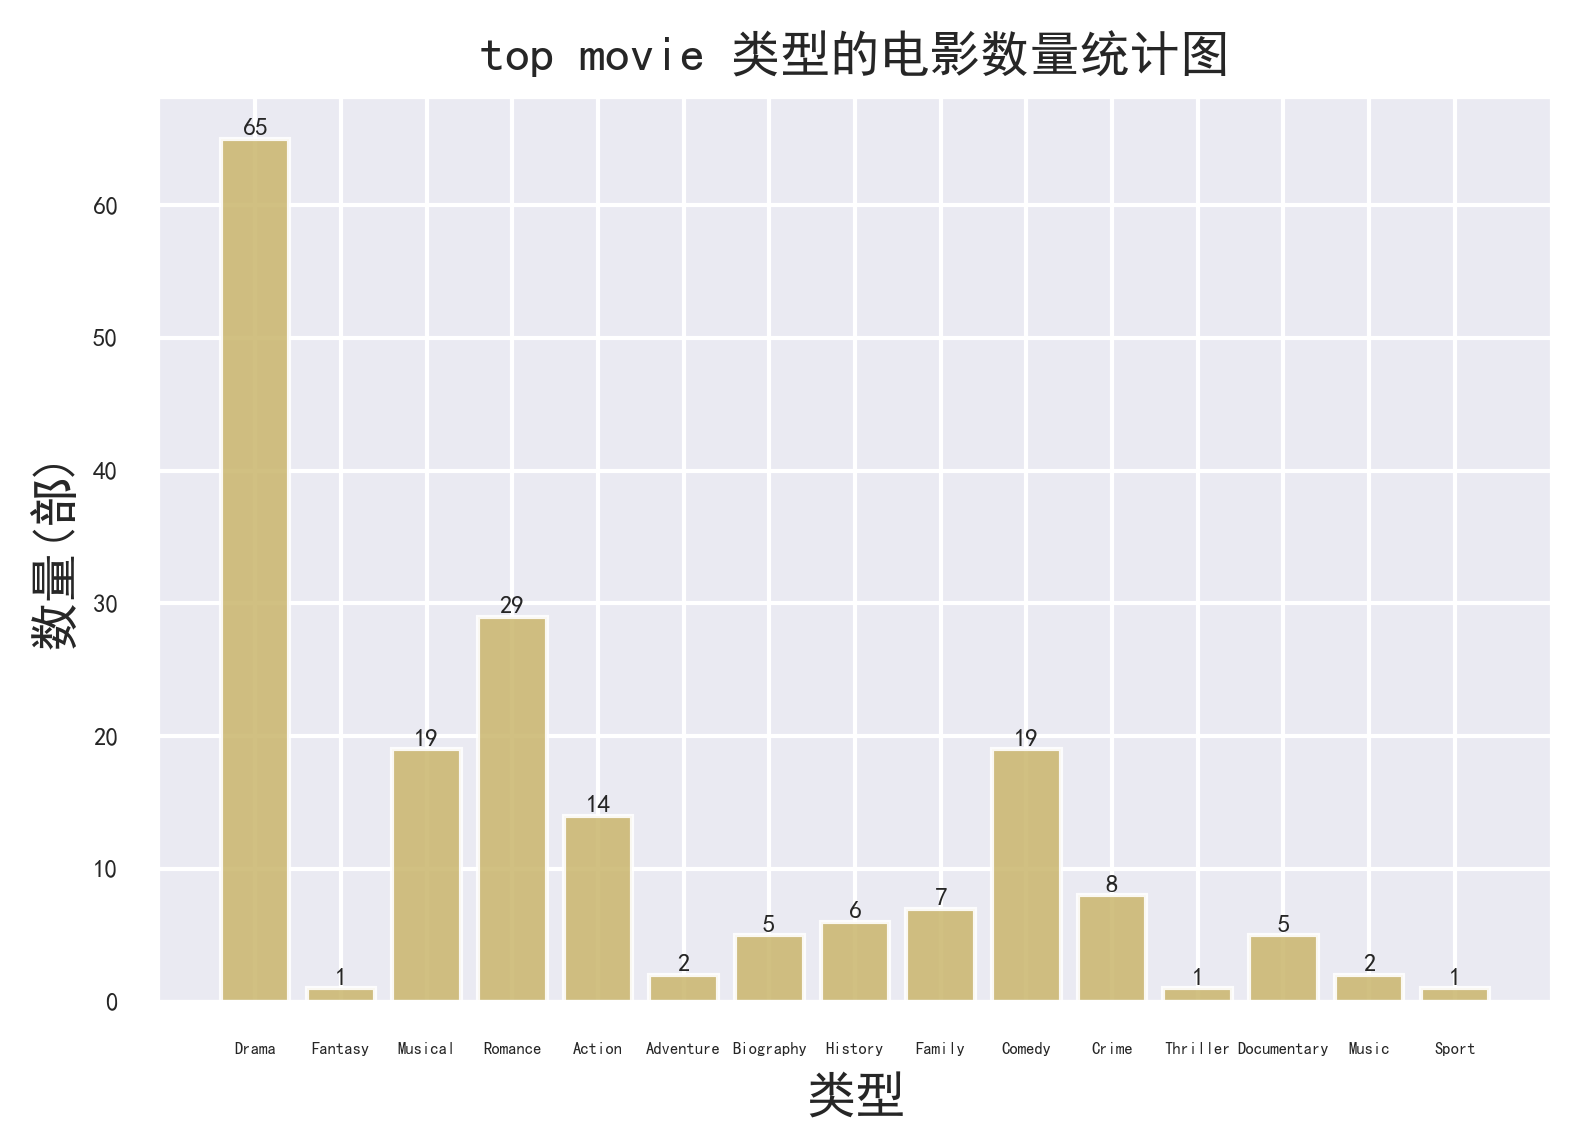

In [15]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_top_movies.keys(),type_of_top_movies.values,color='y',alpha=0.9)
for a,b in zip(type_of_top_movies.keys(),type_of_top_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("top movie 类型的电影数量统计图")
plt.xticks(size=4)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.savefig("top_movie类型的电影数量.jpg")

## 不同类型电影的数量

In [16]:
type_of_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in metadata['Genre'].values:
    ls=ty.split(', ')
    for i in ls:
        if i in type_of_movies.keys():
            type_of_movies[i]+=1
        else:
            type_of_movies[i]=1
type_of_movies=pd.Series(type_of_movies)

In [17]:
type_of_movies

Drama          3796
Comedy         1344
Romance        1380
Musical         412
War              33
Horror          202
Mystery         304
Thriller        679
Action         1686
Crime           875
History          99
Adventure       277
Sci-Fi           32
Sport            40
Biography       115
Family          416
Fantasy         146
Documentary      48
Music            53
Animation        40
News              1
Western           1
dtype: int64

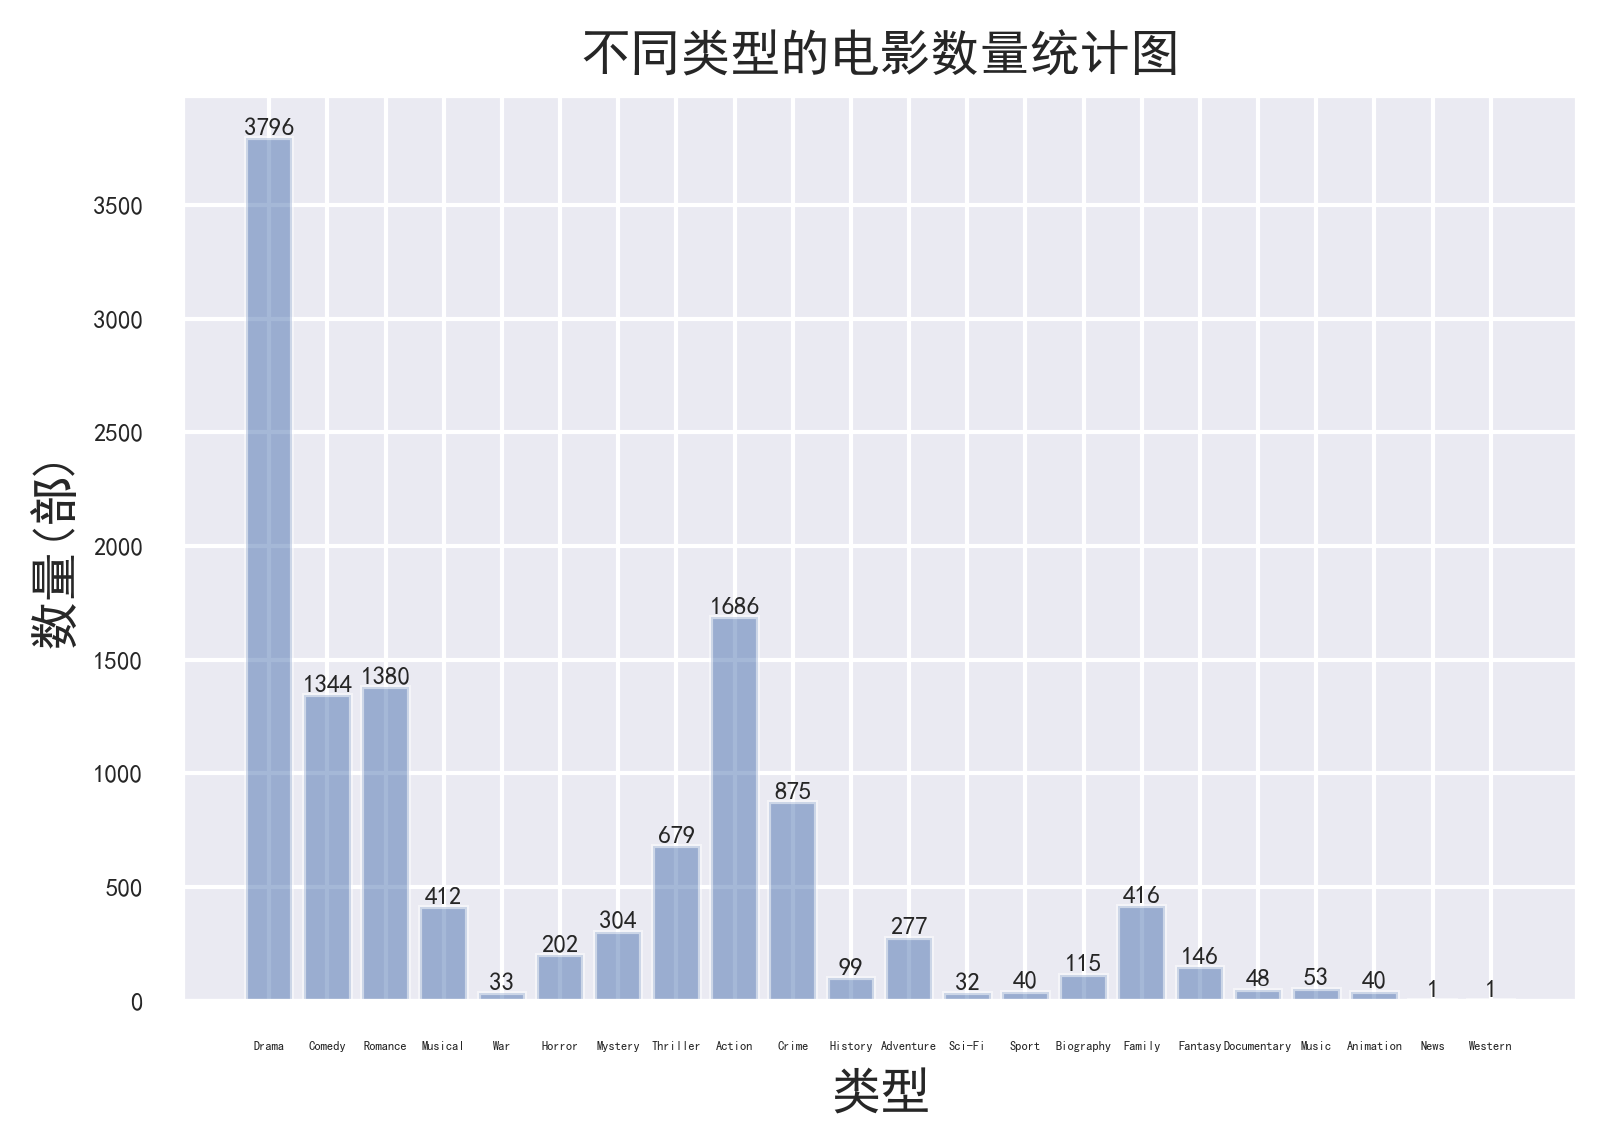

In [18]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_movies.keys(),type_of_movies.values,color='b',alpha=0.5)
for a,b in zip(type_of_movies.keys(),type_of_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("不同类型的电影数量统计图")
plt.xticks(size=3)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.savefig("不同类型的电影数量.jpg")

In [19]:
# from pyecharts import options as opts
# from pyecharts.charts import Pie,Page
# pie =(
#     Pie()
#     .add('',[list(z) for z in zip(type_of_movies.keys(),type_of_movies.values)])
#     .set_global_opts(title_opts=opts.TitleOpts(title="不同类型电影数量饼图"))
#     .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%"))
# )
# pie.render_notebook()

## 不同评分电影数量

In [20]:
metadata_2=metadata.copy()
def init_Rating(s):
    if s<4:
        return '0-4'
    elif s<7:
        return '4-7'
    else:
        return '7-10'
metadata_2['Rating']=metadata_2['Rating'].apply(init_Rating)

In [21]:
Rating_by=metadata_2.groupby(by='Rating')
Rating_num={}
for gp,data in Rating_by:
    Rating_num[gp]=data.shape[0]

In [22]:
Rating_num

{'0-4': 565, '4-7': 3728, '7-10': 1366}

|评分|0-4|4-7|7-10|
|----|---|---|----|
|数量|565|3728|1366|

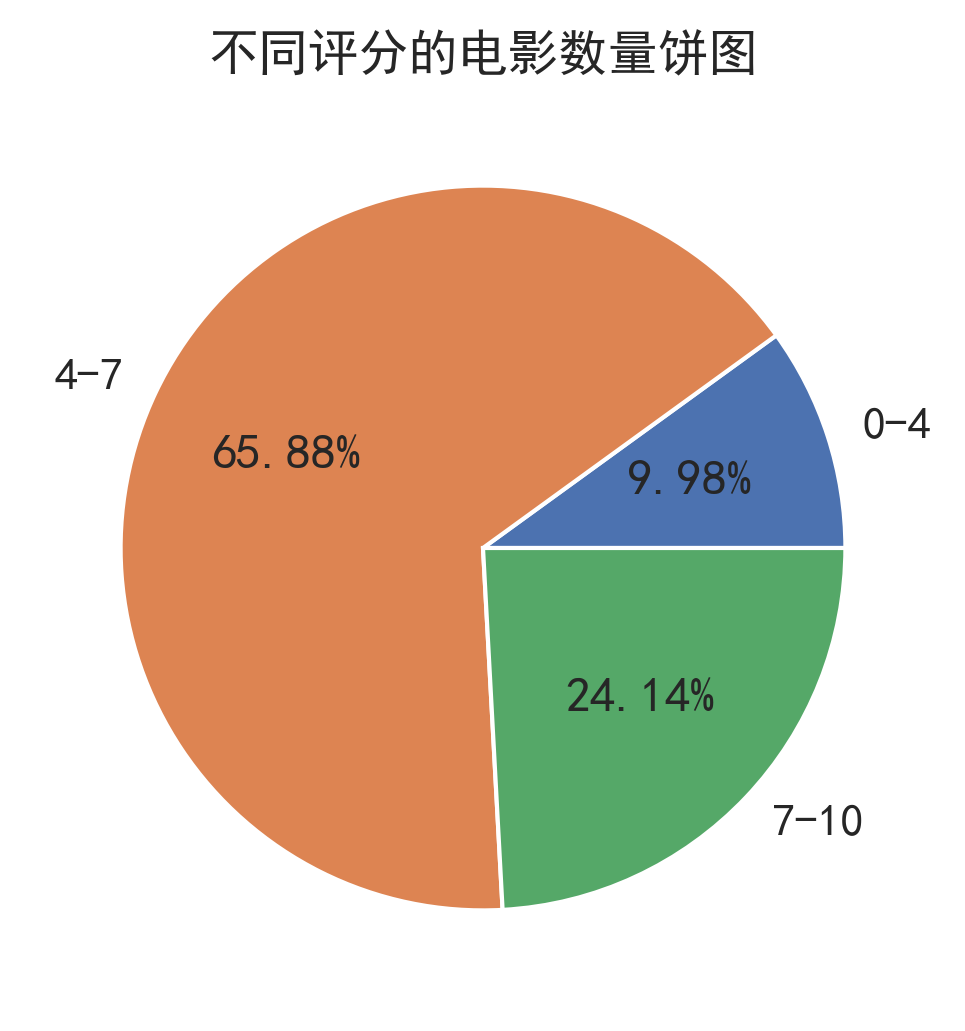

In [23]:
fig=plt.figure(dpi=300)
plt.pie(labels=Rating_num.keys(),x=Rating_num.values(),autopct='%.2f%%')
plt.title('不同评分的电影数量饼图')
plt.savefig('不同评分的电影数量饼图.jpg')

## 不同时长和电影评分和投票之间的关系

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


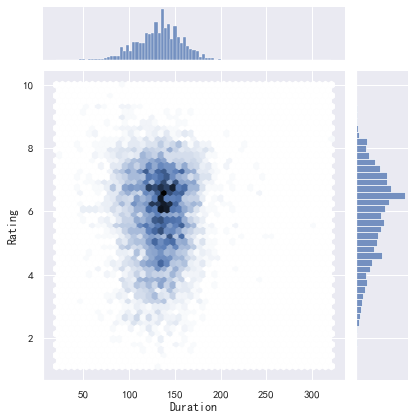

In [24]:
sns.axes_style('white')
sns_plot=sns.jointplot('Duration','Rating',data=metadata,kind='hex')
sns_plot.savefig('时长和评分关系图.jpg')

In [25]:
metadata_1=metadata.copy()

def arounds(s):
    return (s//10+(s%10>=5))*10

metadata_1['Duration']=metadata_1['Duration'].apply(arounds)

In [26]:
dur_by=metadata_1.groupby(by='Duration')
durarion_mean={}
for gp,data in dur_by:
    durarion_mean[gp]=data['Rating'].mean()

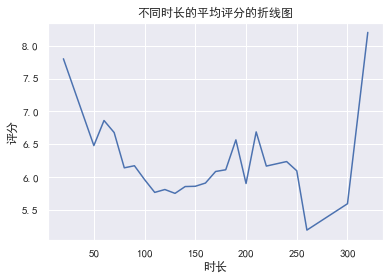

In [27]:
plt.plot(durarion_mean.keys(),durarion_mean.values())
plt.title('不同时长的平均评分的折线图')
plt.xlabel('时长')
plt.ylabel('评分')
plt.savefig('不同时长的平均评分的折线图.jpg')

In [28]:
def init_duration(s):
    if s<90:
        return '<90'
    elif s<150:
        return '90-120'
    elif s<240:
        return '120-150'
    else:
        return '>150'
metadata_2['Duration']=metadata_2['Duration'].apply(init_duration)

In [29]:
dur_by=metadata_2.groupby(by='Duration')
durarion_num={}
for gp,data in dur_by:
    durarion_num[gp]=data.shape[0]

In [30]:
durarion_num

{'120-150': 1473, '90-120': 3944, '<90': 234, '>150': 8}

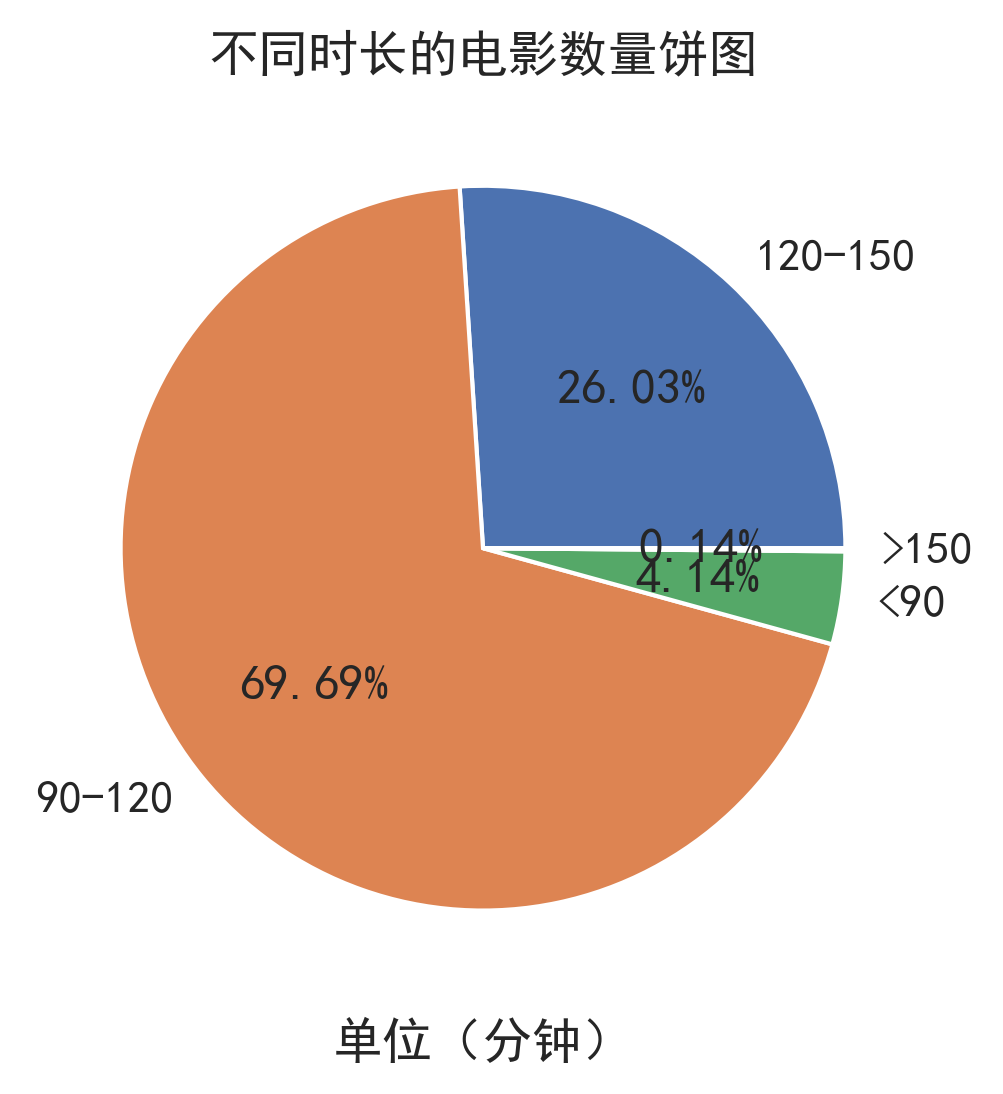

In [31]:
fig=plt.figure(dpi=300)
plt.pie(labels=durarion_num.keys(),x=durarion_num.values(),autopct='%.2f%%')
plt.title('不同时长的电影数量饼图')
plt.xlabel('单位（分钟）')
plt.savefig('不同时长的电影数量饼图.jpg')

## 导演

### 各个导演的电影的平均评分

In [32]:
director_gb=metadata.groupby(by='Director')
director_rating_mean={}
director_num={}
for gp, data in director_gb:
    director_rating_mean[gp]=data['Rating'].mean()
    director_num[gp]=data.shape[0]
director_num=pd.Series(director_num)
director_rating_mean=pd.Series(director_rating_mean)
director_=pd.concat([director_num,director_rating_mean],axis=1)

In [33]:
dir_sorted=director_.sort_values([0,1],ascending=[False,False])

### 统计导演7分以上的电影数量

In [34]:
data_tem=metadata[metadata['Rating']>=7]

In [35]:
dir_gb=data_tem.groupby(by='Director')
dir_high_rating_num={}
dir_high_rating_mean={}
for gp,data in dir_gb:
    dir_high_rating_num[gp]=data.shape[0]
    dir_high_rating_mean[gp]=data['Rating'].mean()
dir_high_rating_num=pd.Series(dir_high_rating_num)
dir_high_rating_mean=pd.Series(dir_high_rating_mean)
dir_high_rating=pd.concat([dir_high_rating_num,dir_high_rating_mean],axis=1)

In [36]:
dir_high_rating.sort_values(0,ascending=False,inplace=True)

In [37]:
dir_high_rating=dir_high_rating.head(20)

TypeError: 'numpy.ndarray' object is not callable

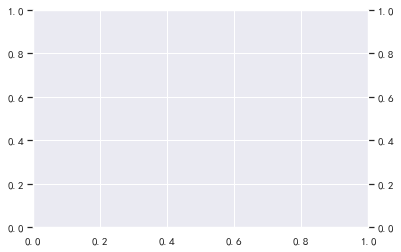

In [41]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(list(dir_high_rating.keys()),list(dir_high_rating[0].values()),color='g')
ax2.bar(list(dir_high_rating.keys()),list(dir_high_rating[1].values()),color='b')
ax1.set_xlabel("导演")
ax1.set_ylabel("数量（部）",color='g')
ax2.set_ylabel("评分（分）",color='b')
plt.show() 

In [ ]:
dir_high_rating.keys()

RangeIndex(start=0, stop=2, step=1)